# Logistic Regression


Logistic Regression is a statistical method and a fundamental algorithm in machine learning used for binary and multiclass classification tasks. Despite its name, it is a classification algorithm, not a regression algorithm. Logistic Regression models the relationship between a binary dependent variable (target variable) and one or more independent variables (features) by estimating the probabilities of different outcomes.

Dataset link-https://drive.google.com/file/d/1KEkAqdwojbLEjoafTvUt-LCcBqf8imQk/view?usp=sharing

# Abstract

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Information
The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attributes
Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


##other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#AGENDA
'''
1- Import the data
2-EDA-->Null,oultier,duplicates etc
3-FEATURE ENG.
  a)-Encoing --->depending on case to case
  b)-rescaling -->depenindg on case to case
4-FEATURE SELECTION
  a)IV
  B) CHI-SQUARE TESTING
  C)VIF
  D)RFE ETC
5-MODEL BUILDING----->LOGISTIC REGRESSION
6-MODEL VALIDATION----->METRICS

'''

'\n1- Import the data\n2-EDA-->Null,oultier,duplicates etc\n3-FEATURE ENG.\n  a)-Encoing --->depending on case to case\n  b)-rescaling -->depenindg on case to case\n4-FEATURE SELECTION\n  a)IV\n  B) CHI-SQUARE TESTING\n  C)VIF\n  D)RFE ETC\n5-MODEL BUILDING----->LOGISTIC REGRESSION\n6-MODEL VALIDATION----->METRICS\n\n'

In [ ]:
import pandas as pd  # Data manipulation
import numpy as np   #numeric imputation
import matplotlib.pyplot as plt #visulization
import seaborn as sns #visulization

In [ ]:
data=pd.read_csv('/content/bank-additional-full-1 (1).csv',sep=';')

In [ ]:
data.head()

age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married     basic.4y       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married     basic.6y       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
1   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
2   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
3   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
4   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
data.shape   #shape of data

(41199, 21)

In [ ]:
data.info()  #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
data.isnull().sum()   #checking the null value

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [ ]:
c=data['marital'].value_counts()  #checking the values with the count

In [ ]:
c

marital
married     24934
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [ ]:
data['marital'].nunique()  #number of unique cat

4

In [ ]:
data['marital'].unique() #unique cat

array(['married', 'single', 'divorced', 'unknown', nan], dtype=object)

In [ ]:
data['marital'].value_counts().tolist()

[24934, 11568, 4612, 80]

In [ ]:
data.describe().T  #descriptive stats  #only for numeric data

count         mean         std       min       25%  \
age             41195.0    40.030319   10.431818    17.000    32.000   
duration        41196.0   258.281265  259.254211     0.000   102.000   
campaign        41196.0     2.567676    2.769751     1.000     1.000   
pdays           41196.0   962.482547  186.893451     0.000   999.000   
previous        41196.0     0.173124    0.494987     0.000     0.000   
emp.var.rate    41196.0     0.081656    1.570894    -3.400    -1.800   
cons.price.idx  41195.0    93.575867    0.578999    92.201    93.075   
cons.conf.idx   41196.0   -40.504600    4.629972   -50.800   -42.700   
euribor3m       41196.0     3.620787    1.734655     0.634     1.344   
nr.employed     41196.0  5166.996405   72.300104  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [ ]:
Q1=32
Q3=47
IQR=Q3-Q1
IQR

15

In [ ]:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
print(LB,UB)

9.5 69.5


In [ ]:
data.describe(include='object').T #(Transpose (row to columns or columns to row))  #only for object data

count unique                top   freq
job          41194     12             admin.  10422
marital      41194      4            married  24934
education    41194      8  university.degree  12168
default      41195      3                 no  32595
housing      41196      3                yes  21584
loan         41195      3                 no  33957
contact      41195      2           cellular  26151
month        41196     10                may  13769
day_of_week  41196      5                thu   8623
poutcome     41194      3        nonexistent  35563
y            41196      2                 no  36556

In [ ]:
data.describe(include='all')  #if you want both (O+N) then all

age     job  marital          education default housing  \
count   41195.000000   41194    41194              41194   41195   41196   
unique           NaN      12        4                  8       3       3   
top              NaN  admin.  married  university.degree      no     yes   
freq             NaN   10422    24934              12168   32595   21584   
mean       40.030319     NaN      NaN                NaN     NaN     NaN   
std        10.431818     NaN      NaN                NaN     NaN     NaN   
min        17.000000     NaN      NaN                NaN     NaN     NaN   
25%        32.000000     NaN      NaN                NaN     NaN     NaN   
50%        38.000000     NaN      NaN                NaN     NaN     NaN   
75%        47.000000     NaN      NaN                NaN     NaN     NaN   
max        98.000000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   41195     41195  41196       41196  ...  41196.000000  41196.000000   
unique      3         2     10           5  ...           NaN           NaN   
top        no  cellular    may         thu  ...           NaN           NaN   
freq    33957     26151  13769        8623  ...           NaN           NaN   
mean      NaN       NaN    NaN         NaN  ...      2.567676    962.482547   
std       NaN       NaN    NaN         NaN  ...      2.769751    186.893451   
min       NaN       NaN    NaN         NaN  ...      1.000000      0.000000   
25%       NaN       NaN    NaN         NaN  ...      1.000000    999.000000   
50%       NaN       NaN    NaN         NaN  ...      2.000000    999.000000   
75%       NaN       NaN    NaN         NaN  ...      3.000000    999.000000   
max       NaN       NaN    NaN         NaN  ...     56.000000    999.000000   

            previous     poutcome  emp.var.rate  cons.price.idx  \
count   41196.000000        41194  41196.000000    41195.000000   
unique           NaN            3           NaN             NaN   
top              NaN  nonexistent           NaN             NaN   
freq             NaN        35563           NaN             NaN   
mean        0.173124          NaN      0.081656       93.575867   
std         0.494987          NaN      1.570894        0.578999   
min         0.000000          NaN     -3.400000       92.201000   
25%         0.000000          NaN     -1.800000       93.075000   
50%         0.000000          NaN      1.100000       93.749000   
75%         0.000000          NaN      1.400000       93.994000   
max         7.000000          NaN      1.400000       94.767000   

        cons.conf.idx     euribor3m   nr.employed      y  
count    41196.000000  41196.000000  41196.000000  41196  
unique            NaN           NaN           NaN      2  
top               NaN           NaN           NaN     no  
freq              NaN           NaN           NaN  36556  
mean       -40.504600      3.620787   5166.996405    NaN  
std          4.629972      1.734655     72.300104    NaN  
min        -50.800000      0.634000   4963.600000    NaN  
25%        -42.700000      1.344000   5099.100000    NaN  
50%        -41.800000      4.857000   5191.000000    NaN  
75%        -36.400000      4.961000   5228.100000    NaN  
max        -26.900000      5.045000   5228.100000    NaN  

[11 rows x 21 columns]

In [ ]:
col=list(data.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

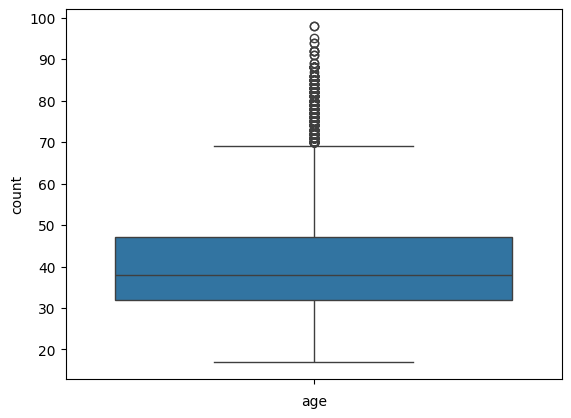

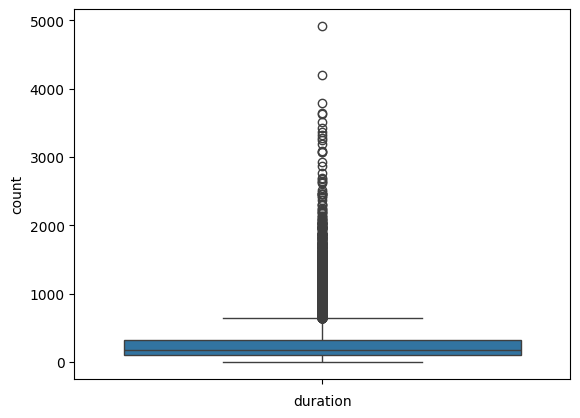

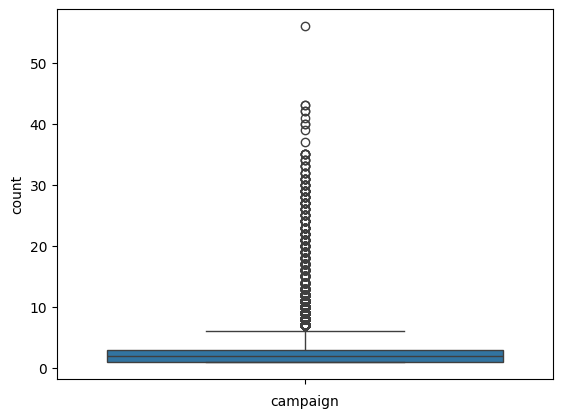

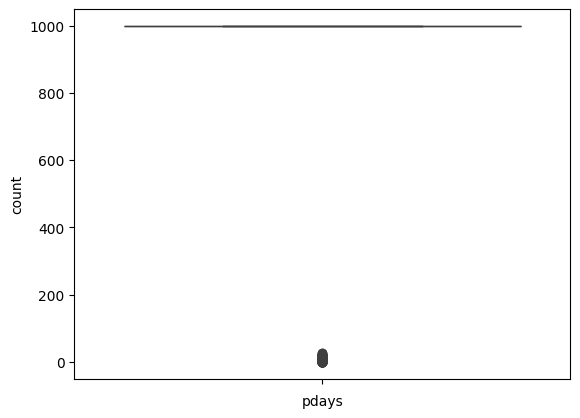

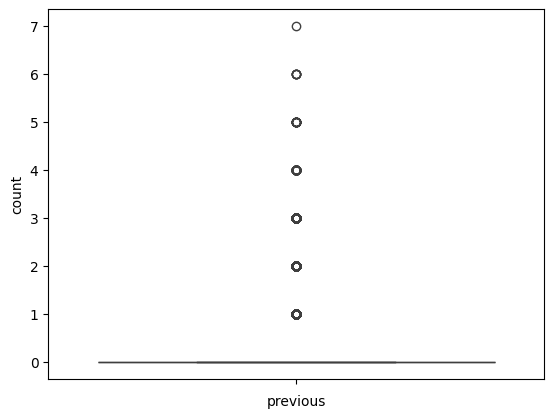

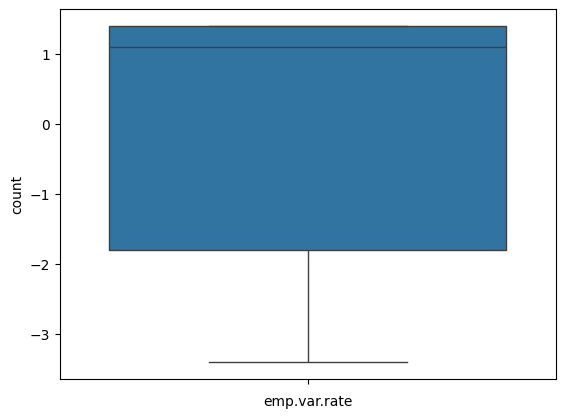

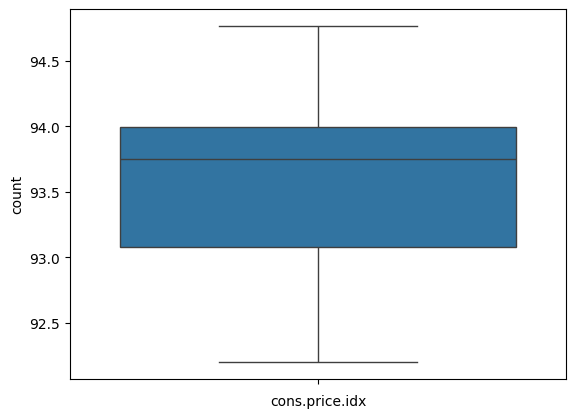

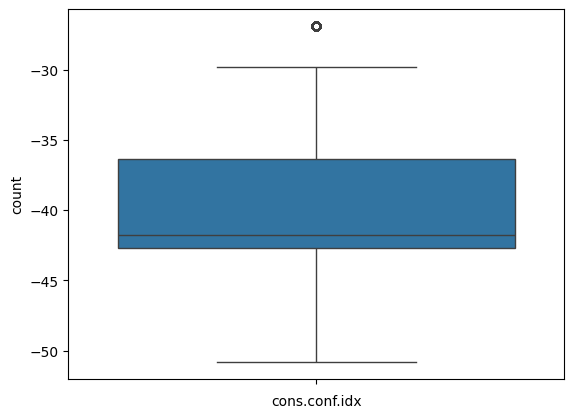

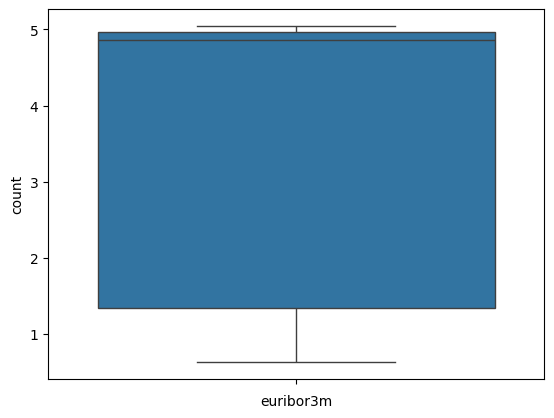

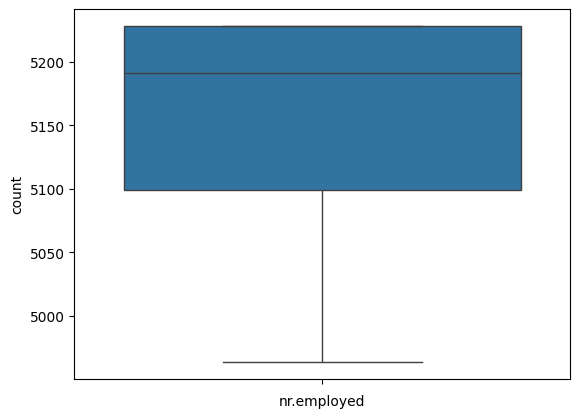

In [ ]:
#to check the outliers
for col_name in col:
    if (data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
import plotly.express as px

In [ ]:
for col_name in col:
    if data[col_name].dtypes == 'int64' or data[col_name].dtypes == 'float64':
        fig = px.box(data, y=col_name, title=f"Box plot of {col_name}")
        fig.update_layout(yaxis_title="Values", xaxis_title=col_name)
        fig.show()

In [ ]:
for col_name in col:
    if data[col_name].dtypes == 'int64' or data[col_name].dtypes == 'float64':
        fig = px.box(data, y=col_name,)
        fig.show()

In [ ]:
data['pdays'].value_counts()


pdays
999.0    39681
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: count, dtype: int64

In [ ]:
data['previous'].value_counts()

previous
0.0    35563
1.0     4569
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: count, dtype: int64

In [ ]:
#!pip install sweetviz #sweet visaulzation

In [ ]:
#import sweetviz as sv

In [ ]:
#report = sv.analyze(data)
#report.show_html('harsh_bank_report.html')

https://colab.research.google.com/drive/1uwWgK6Q-s7kuDE-SUKV6ne3D81rQAItL

In [ ]:
#!pip install autoviz

In [ ]:
#from autoviz.AutoViz_Class import AutoViz_Class

In [ ]:
#AV = AutoViz_Class()
#report = AV.AutoViz(data)

In [ ]:
data.duplicated().sum()

15

In [ ]:
#handling outlier


In [ ]:
''' for example if you want to use loop

col_names=['age','duration','campaign','cons.conf.idx']
for col in col_names:
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  data=data[(data[col]>=Q1-1.5*IQR)& (data[col] <=Q3+1.5*IQR)]
  '''


" for example if you want to use loop\n\ncol_names=['age','duration','campaign','cons.conf.idx']\nfor col in col_names:\n  Q1=data[col].quantile(0.25)\n  Q3=data[col].quantile(0.75)\n  IQR=Q3-Q1\n  data=data[(data[col]>=Q1-1.5*IQR)& (data[col] <=Q3+1.5*IQR)]\n  "

In [ ]:
col_names=['age','duration','campaign','cons.conf.idx']
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
IQR=Q3-Q1
data=data[(data.age>=Q1-1.5*IQR)& (data.age <=Q3+1.5*IQR)]


Q1=data.duration.quantile(0.25)
Q3=data.duration.quantile(0.75)
IQR=Q3-Q1
data=data[(data.duration>=Q1-1.5*IQR)& (data.duration <=Q3+1.5*IQR)]

Q1=data.campaign.quantile(0.25)
Q3=data.campaign.quantile(0.75)
IQR=Q3-Q1
data=data[(data.campaign>=Q1-1.5*IQR)& (data.campaign <=Q3+1.5*IQR)]

Q1=data['cons.conf.idx'].quantile(0.25)
Q3=data['cons.conf.idx'].quantile(0.75)
IQR=Q3-Q1
data=data[(data['cons.conf.idx']>=Q1-1.5*IQR)& (data['cons.conf.idx'] <=Q3+1.5*IQR)]



In [ ]:
data

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41181  37.0       admin.  married    university.degree       no     yes   no   
41182  29.0   unemployed   single             basic.4y       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41181   cellular   nov         fri  ...       1.0  999.0       0.0   
41182   cellular   nov         fri  ...       1.0    9.0       1.0   
41184   cellular   nov         fri  ...       1.0  999.0       0.0   
41185   cellular   nov         fri  ...       2.0  999.0       0.0   
41186   cellular   nov         fri  ...       1.0  999.0       0.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41181       4963.6  yes  
41182       4963.6   no  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  

[35176 rows x 21 columns]

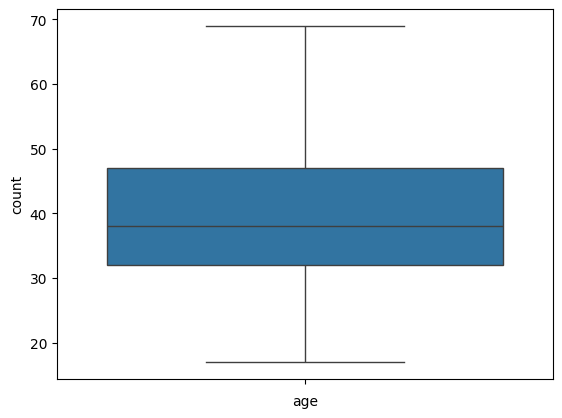

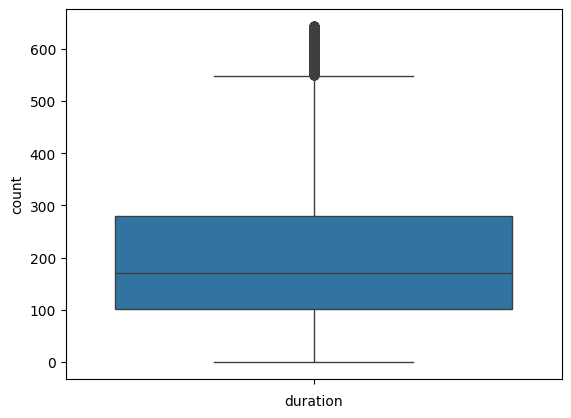

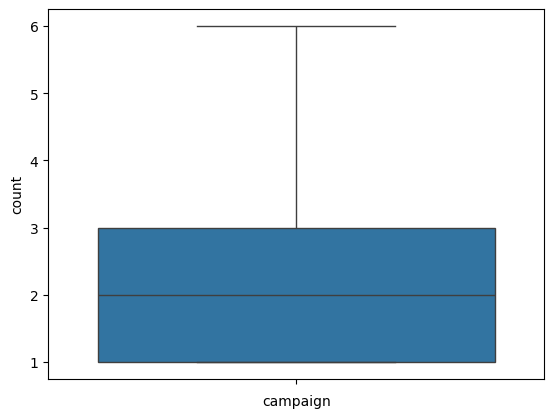

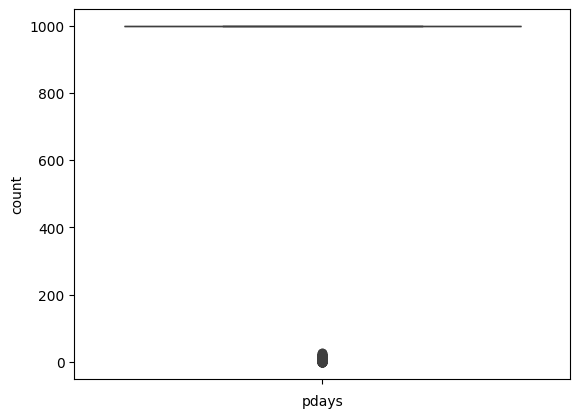

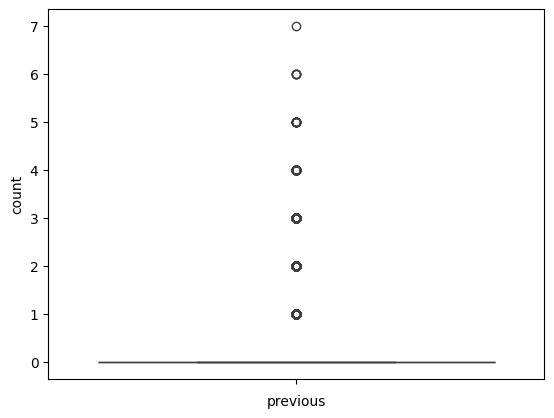

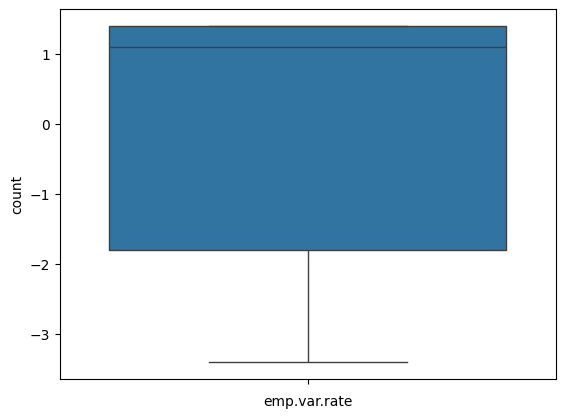

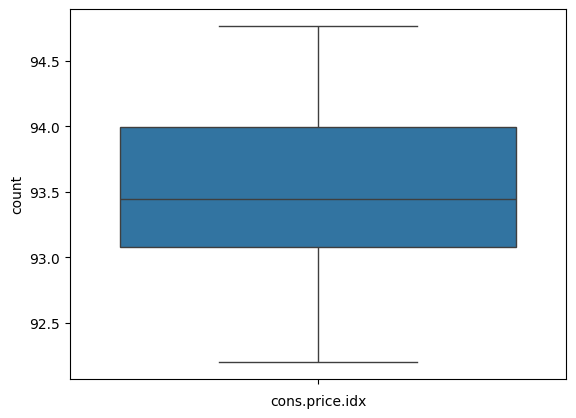

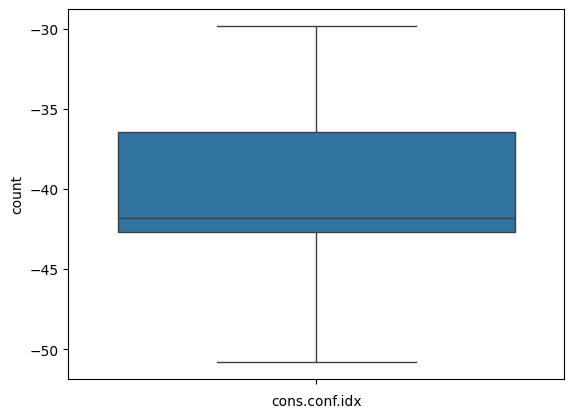

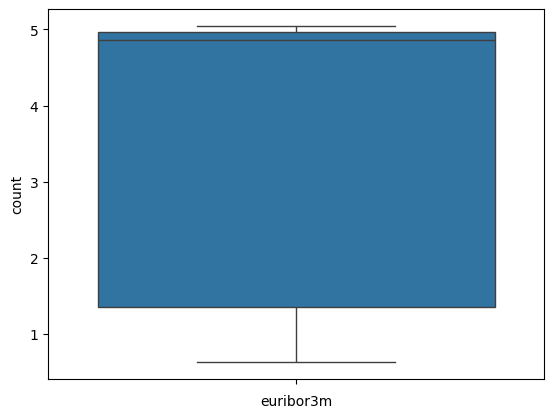

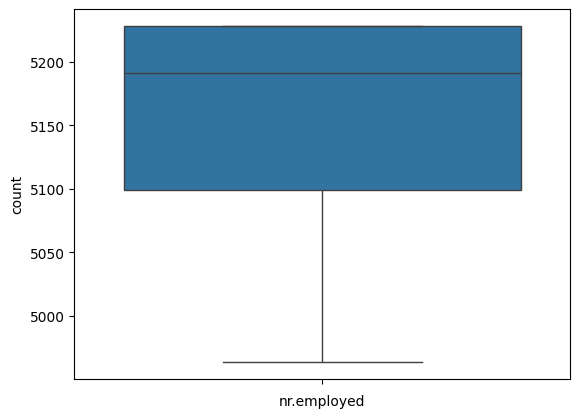

In [ ]:
for col_name in col:
    if (data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.duplicated().sum()

11

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(35165, 21)

In [ ]:
#Feature eng-->enconding--->Label encoding,one-hot  encoding,ordinal encoding

In [ ]:
#dependent variable
#feature
#feature selection

'''20
F,50K,W===N
W,50K,F
123=321,231,213'''

'20\nF,50K,W===N\nW,50K,F\n123=321,231,213'

In [ ]:
data.head()

age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married     basic.4y       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married     basic.6y       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
1   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
2   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
3   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
4   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
data['y'].value_counts()

y
no     32435
yes     2730
Name: count, dtype: int64

In [ ]:
data['y']=np.where(data['y']=='yes',1,0)

<ipython-input-51-32aff7771526>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['y']=data['y'].astype(str)

<ipython-input-52-f616f47db434>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['y'].value_counts()

y
0    32435
1     2730
Name: count, dtype: int64

In [ ]:
#C------->N--->R=Encoding
#N------->C--->C=
#0-18-35-50-65-100
#0-50
#50-100

In [ ]:
data

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41181  37.0       admin.  married    university.degree       no     yes   no   
41182  29.0   unemployed   single             basic.4y       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41181   cellular   nov         fri  ...       1.0  999.0       0.0   
41182   cellular   nov         fri  ...       1.0    9.0       1.0   
41184   cellular   nov         fri  ...       1.0  999.0       0.0   
41185   cellular   nov         fri  ...       2.0  999.0       0.0   
41186   cellular   nov         fri  ...       1.0  999.0       0.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41181       4963.6  1  
41182       4963.6  0  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  

[35165 rows x 21 columns]

In [ ]:
'''
bins=[0,50,100]
data['age']=pd.cut(data['age'],bins)
data['age']=data.age.astype(str)'''

"\nbins=[0,50,100]\ndata['age']=pd.cut(data['age'],bins)\ndata['age']=data.age.astype(str)"

In [ ]:
data

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41181  37.0       admin.  married    university.degree       no     yes   no   
41182  29.0   unemployed   single             basic.4y       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0  999.0       0.0   
1      telephone   may         mon  ...       1.0  999.0       0.0   
2      telephone   may         mon  ...       1.0  999.0       0.0   
3      telephone   may         mon  ...       1.0  999.0       0.0   
4      telephone   may         mon  ...       1.0  999.0       0.0   
...          ...   ...         ...  ...       ...    ...       ...   
41181   cellular   nov         fri  ...       1.0  999.0       0.0   
41182   cellular   nov         fri  ...       1.0    9.0       1.0   
41184   cellular   nov         fri  ...       1.0  999.0       0.0   
41185   cellular   nov         fri  ...       2.0  999.0       0.0   
41186   cellular   nov         fri  ...       1.0  999.0       0.0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41181  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41181       4963.6  1  
41182       4963.6  0  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  

[35165 rows x 21 columns]

In [ ]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
#to encode the object data to integer
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
    data[i]=le.fit_transform(data[i])

<ipython-input-59-60c98e004a2b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-60c98e004a2b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-60c98e004a2b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-60c98e0

In [ ]:
data

age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    3        1          0        0        0     0        1      6   
1      57.0    7        1          3        1        0     0        1      6   
2      37.0    7        1          3        0        2     0        1      6   
3      40.0    0        1          1        0        0     0        1      6   
4      56.0    7        1          3        0        0     2        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41181  37.0    0        1          6        0        2     0        0      7   
41182  29.0   10        2          0        0        2     0        0      7   
41184  46.0    1        1          5        0        0     0        0      7   
41185  56.0    5        1          6        0        2     0        0      7   
41186  44.0    9        1          5        0        0     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...       1.0  999.0       0.0         1           1.1   
1                1  ...       1.0  999.0       0.0         1           1.1   
2                1  ...       1.0  999.0       0.0         1           1.1   
3                1  ...       1.0  999.0       0.0         1           1.1   
4                1  ...       1.0  999.0       0.0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41181            0  ...       1.0  999.0       0.0         1          -1.1   
41182            0  ...       1.0    9.0       1.0         2          -1.1   
41184            0  ...       1.0  999.0       0.0         1          -1.1   
41185            0  ...       2.0  999.0       0.0         1          -1.1   
41186            0  ...       1.0  999.0       0.0         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41181          94.767          -50.8      1.028       4963.6  1  
41182          94.767          -50.8      1.028       4963.6  0  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  

[35165 rows x 21 columns]

In [ ]:
X = data.drop('y',axis=1, inplace=False)
y = data['y']


In [ ]:
X

age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    3        1          0        0        0     0        1      6   
1      57.0    7        1          3        1        0     0        1      6   
2      37.0    7        1          3        0        2     0        1      6   
3      40.0    0        1          1        0        0     0        1      6   
4      56.0    7        1          3        0        0     2        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41181  37.0    0        1          6        0        2     0        0      7   
41182  29.0   10        2          0        0        2     0        0      7   
41184  46.0    1        1          5        0        0     0        0      7   
41185  56.0    5        1          6        0        2     0        0      7   
41186  44.0    9        1          5        0        0     0        0      7   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
0                1     261.0       1.0  999.0       0.0         1   
1                1     149.0       1.0  999.0       0.0         1   
2                1     226.0       1.0  999.0       0.0         1   
3                1     151.0       1.0  999.0       0.0         1   
4                1     307.0       1.0  999.0       0.0         1   
...            ...       ...       ...    ...       ...       ...   
41181            0     281.0       1.0  999.0       0.0         1   
41182            0     112.0       1.0    9.0       1.0         2   
41184            0     383.0       1.0  999.0       0.0         1   
41185            0     189.0       2.0  999.0       0.0         1   
41186            0     442.0       1.0  999.0       0.0         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
41181          -1.1          94.767          -50.8      1.028       4963.6  
41182          -1.1          94.767          -50.8      1.028       4963.6  
41184          -1.1          94.767          -50.8      1.028       4963.6  
41185          -1.1          94.767          -50.8      1.028       4963.6  
41186          -1.1          94.767          -50.8      1.028       4963.6  

[35165 rows x 20 columns]

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35165, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns :
    if data[i].dtype == 'object' :
        data[i] = le.fit_transform(data[i])


<ipython-input-64-3c239a2356e8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    3        1          0        0        0     0        1      6   
1      57.0    7        1          3        1        0     0        1      6   
2      37.0    7        1          3        0        2     0        1      6   
3      40.0    0        1          1        0        0     0        1      6   
4      56.0    7        1          3        0        0     2        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41181  37.0    0        1          6        0        2     0        0      7   
41182  29.0   10        2          0        0        2     0        0      7   
41184  46.0    1        1          5        0        0     0        0      7   
41185  56.0    5        1          6        0        2     0        0      7   
41186  44.0    9        1          5        0        0     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...       1.0  999.0       0.0         1           1.1   
1                1  ...       1.0  999.0       0.0         1           1.1   
2                1  ...       1.0  999.0       0.0         1           1.1   
3                1  ...       1.0  999.0       0.0         1           1.1   
4                1  ...       1.0  999.0       0.0         1           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41181            0  ...       1.0  999.0       0.0         1          -1.1   
41182            0  ...       1.0    9.0       1.0         2          -1.1   
41184            0  ...       1.0  999.0       0.0         1          -1.1   
41185            0  ...       2.0  999.0       0.0         1          -1.1   
41186            0  ...       1.0  999.0       0.0         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41181          94.767          -50.8      1.028       4963.6  1  
41182          94.767          -50.8      1.028       4963.6  0  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  

[35165 rows x 21 columns]

In [ ]:
#Feature selection technique

In [ ]:
#dEPENDENT & INDEPENDENT
#d & i is good
#BIKEPRICE~HOW MUCH KM YOUR BIKE TRAVEL+HOW OLD +CC+COLOR+MILEAGE
#

VIF stands for **Variance Inflation Factor**. It is a measure used to detect **multicollinearity** in a regression model, which occurs when two or more independent variables are highly correlated with each other. High multicollinearity can make it difficult to interpret the effects of individual predictors, as they are not contributing unique information.

### How VIF Works:

1. **Formula**:  
   The VIF for a particular predictor variable is calculated as:
   \[
   \text{VIF} = \frac{1}{1 - R^2}
   \]
   where \( R^2 \) is the coefficient of determination from a regression of that variable against all other independent variables.

2. **Interpreting VIF**:
   - **VIF = 1**: No correlation between the predictor and other variables (no multicollinearity).
   - **VIF > 1**: There is some correlation, but it’s not strong enough to cause concern.
   - **VIF > 5-10**: Indicates high multicollinearity and suggests that the predictor is highly correlated with other variables in the model. It may be a good idea to remove one of the correlated variables.
   
3. **Why VIF is important**:
   - A high VIF indicates that a predictor variable can be explained by other variables in the model, which can lead to instability in the coefficient estimates.
   - High multicollinearity can inflate the variance of the regression coefficients, making them unreliable.

### Conclusion:
VIF helps you detect and address multicollinearity, improving the reliability and interpretability of your regression model.

Finding the Variance Inflation Factor and removing the colummns which have VIF more than 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature           VIF
0              age     22.113993
1              job      2.100861
2          marital      5.690071
3        education      4.560285
4          default      1.411946
5          housing      2.212409
6             loan      1.208306
7          contact      2.942422
8            month      6.685085
9      day_of_week      3.099808
10        duration      3.231026
11        campaign      3.615256
12           pdays    174.895512
13        previous      6.070087
14        poutcome     34.934345
15    emp.var.rate     37.592081
16  cons.price.idx  37885.320838
17   cons.conf.idx    143.576459
18       euribor3m    322.672944
19     nr.employed  43115.201160

In [ ]:
data = data.drop(["nr.employed"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature         VIF
0              age   22.107715
1              job    2.100612
2          marital    5.689362
3        education    4.558657
4          default    1.409350
5          housing    2.212084
6             loan    1.208260
7          contact    2.446094
8            month    5.784547
9      day_of_week    3.098930
10        duration    3.221277
11        campaign    3.602129
12           pdays  174.850562
13        previous    5.973295
14        poutcome   34.669168
15    emp.var.rate   22.287122
16  cons.price.idx  729.560618
17   cons.conf.idx  124.902304
18       euribor3m  130.883838

In [ ]:
data = data.drop(["cons.price.idx"], axis = 1)

In [ ]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature        VIF
0             age  20.980560
1             job   2.095040
2         marital   5.544426
3       education   4.503309
4         default   1.409322
5         housing   2.210417
6            loan   1.207694
7         contact   2.348235
8           month   5.726141
9     day_of_week   3.084650
10       duration   3.196457
11       campaign   3.585901
12          pdays  95.504094
13       previous   3.040971
14       poutcome  17.519163
15   emp.var.rate  16.710516
16  cons.conf.idx  82.695453
17      euribor3m  93.815501

In [ ]:
data = data.drop(["pdays"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature        VIF
0             age  20.156176
1             job   2.091851
2         marital   5.426164
3       education   4.449798
4         default   1.409226
5         housing   2.206690
6            loan   1.207556
7         contact   2.274814
8           month   5.664673
9     day_of_week   3.072542
10       duration   3.184520
11       campaign   3.566503
12       previous   1.497582
13       poutcome   8.132807
14   emp.var.rate  12.914012
15  cons.conf.idx  42.662876
16      euribor3m  63.941291

In [ ]:
data = data.drop(["euribor3m"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature        VIF
0             age  17.204219
1             job   2.085747
2         marital   5.226350
3       education   4.292137
4         default   1.408832
5         housing   2.198757
6            loan   1.207316
7         contact   2.266725
8           month   5.270616
9     day_of_week   3.032416
10       duration   3.177169
11       campaign   3.560596
12       previous   1.479792
13       poutcome   8.004800
14   emp.var.rate   1.547619
15  cons.conf.idx  32.081295

In [ ]:
data = data.drop(["cons.conf.idx"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature        VIF
0            age  11.058997
1            job   2.076503
2        marital   4.372058
3      education   4.193335
4        default   1.407850
5        housing   2.162435
6           loan   1.204070
7        contact   2.242675
8          month   4.871672
9    day_of_week   2.969072
10      duration   3.105927
11      campaign   3.394175
12      previous   1.477225
13      poutcome   7.682693
14  emp.var.rate   1.532256

In [ ]:
data = data.drop(["poutcome"], axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if (( data[col].dtype != "object") & (col != "y")):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

feature       VIF
0            age  9.412343
1            job  2.071734
2        marital  4.137890
3      education  4.118658
4        default  1.407372
5        housing  2.156260
6           loan  1.203682
7        contact  2.232117
8          month  4.858435
9    day_of_week  2.943752
10      duration  3.052926
11      campaign  3.370618
12      previous  1.376437
13  emp.var.rate  1.526986

In [ ]:
vif_data.feature

0              age
1              job
2          marital
3        education
4          default
5          housing
6             loan
7          contact
8            month
9      day_of_week
10        duration
11        campaign
12        previous
13    emp.var.rate
Name: feature, dtype: object

In [ ]:
ind_features = list(vif_data.feature)
ind_features
df_ind = data[ind_features]
df_ind

age  job  marital  education  default  housing  loan  contact  month  \
0      56.0    3        1          0        0        0     0        1      6   
1      57.0    7        1          3        1        0     0        1      6   
2      37.0    7        1          3        0        2     0        1      6   
3      40.0    0        1          1        0        0     0        1      6   
4      56.0    7        1          3        0        0     2        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41181  37.0    0        1          6        0        2     0        0      7   
41182  29.0   10        2          0        0        2     0        0      7   
41184  46.0    1        1          5        0        0     0        0      7   
41185  56.0    5        1          6        0        2     0        0      7   
41186  44.0    9        1          5        0        0     0        0      7   

       day_of_week  duration  campaign  previous  emp.var.rate  
0                1     261.0       1.0       0.0           1.1  
1                1     149.0       1.0       0.0           1.1  
2                1     226.0       1.0       0.0           1.1  
3                1     151.0       1.0       0.0           1.1  
4                1     307.0       1.0       0.0           1.1  
...            ...       ...       ...       ...           ...  
41181            0     281.0       1.0       0.0          -1.1  
41182            0     112.0       1.0       1.0          -1.1  
41184            0     383.0       1.0       0.0          -1.1  
41185            0     189.0       2.0       0.0          -1.1  
41186            0     442.0       1.0       0.0          -1.1  

[35165 rows x 14 columns]

In [ ]:
df_dep = data["y"]
df_dep

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35165, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, train_size= 0.75, random_state=0)

In [ ]:
x_train

age  job  marital  education  default  housing  loan  contact  month  \
4876   33.0    9        2          6        0        0     0        1      6   
21706  52.0    1        1          2        0        0     0        0      1   
8752   44.0    2        2          6        0        0     0        1      4   
22545  59.0    5        1          6        1        0     0        0      1   
20101  41.0    6        1          5        0        2     0        0      1   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
24347  58.0    5        1          3        0        2     0        0      7   
37064  42.0    0        2          6        0        2     2        0      3   
35152  25.0    1        2          2        0        0     0        0      6   
24867  34.0    1        1          5        0        2     0        0      7   
2979   59.0    5        1          5        1        2     0        1      6   

       day_of_week  duration  campaign  previous  emp.var.rate  
4876             4     127.0       1.0       0.0           1.1  
21706            3     329.0       3.0       0.0           1.4  
8752             2      75.0       1.0       0.0           1.4  
22545            0     217.0       3.0       0.0           1.4  
20101            1     323.0       1.0       0.0           1.4  
...            ...       ...       ...       ...           ...  
24347            1      49.0       1.0       0.0          -0.1  
37064            4     122.0       1.0       0.0          -2.9  
35152            0     170.0       2.0       0.0          -1.8  
24867            3     135.0       3.0       0.0          -0.1  
2979             4     125.0       2.0       0.0           1.1  

[26373 rows x 14 columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
x_train

age  job  marital  education  default  housing  loan  contact  month  \
4876   33.0    9        2          6        0        0     0        1      6   
21706  52.0    1        1          2        0        0     0        0      1   
8752   44.0    2        2          6        0        0     0        1      4   
22545  59.0    5        1          6        1        0     0        0      1   
20101  41.0    6        1          5        0        2     0        0      1   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
24347  58.0    5        1          3        0        2     0        0      7   
37064  42.0    0        2          6        0        2     2        0      3   
35152  25.0    1        2          2        0        0     0        0      6   
24867  34.0    1        1          5        0        2     0        0      7   
2979   59.0    5        1          5        1        2     0        1      6   

       day_of_week  duration  campaign  previous  emp.var.rate  
4876             4     127.0       1.0       0.0           1.1  
21706            3     329.0       3.0       0.0           1.4  
8752             2      75.0       1.0       0.0           1.4  
22545            0     217.0       3.0       0.0           1.4  
20101            1     323.0       1.0       0.0           1.4  
...            ...       ...       ...       ...           ...  
24347            1      49.0       1.0       0.0          -0.1  
37064            4     122.0       1.0       0.0          -2.9  
35152            0     170.0       2.0       0.0          -1.8  
24867            3     135.0       3.0       0.0          -0.1  
2979             4     125.0       2.0       0.0           1.1  

[26373 rows x 14 columns]

In [ ]:
LR.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
x_test

age  job  marital  education  default  housing  loan  contact  month  \
34348  27.0    0        1          3        0        2     2        0      6   
28335  37.0    9        1          5        1        2     2        0      0   
19370  60.0    1        1          0        1        2     0        0      1   
16719  32.0    9        1          5        0        0     0        0      3   
631    30.0    0        2          6        0        0     0        1      6   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
36329  26.0    0        2          3        0        0     0        0      4   
25680  33.0    9        1          6        0        0     0        0      7   
37631  28.0    0        2          6        0        2     0        0      1   
14641  33.0    0        1          3        1        2     0        0      3   
21207  31.0    4        1          6        0        2     2        0      1   

       day_of_week  duration  campaign  previous  emp.var.rate  
34348            2     201.0       1.0       0.0          -1.8  
28335            4     101.0       1.0       0.0          -1.8  
19370            4     165.0       1.0       0.0           1.4  
16719            4     495.0       2.0       0.0           1.4  
631              3     246.0       1.0       0.0           1.1  
...            ...       ...       ...       ...           ...  
36329            3     479.0       1.0       0.0          -2.9  
25680            4     200.0       1.0       0.0          -0.1  
37631            1     340.0       1.0       0.0          -2.9  
14641            3     194.0       4.0       0.0           1.4  
21207            1     203.0       2.0       0.0           1.4  

[8792 rows x 14 columns]

In [ ]:
test_pred = LR.predict(x_test)

In [ ]:
test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
x = np.unique(test_pred)
x

array([0, 1])

In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8137
           1       0.48      0.20      0.29       655

    accuracy                           0.92      8792
   macro avg       0.71      0.59      0.62      8792
weighted avg       0.90      0.92      0.91      8792



In [ ]:
accuracy_score(y_test, test_pred)

0.9279053900386627

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/bank-additional-full-1 (1).csv',sep=';')

In [ ]:
data.head()

age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married     basic.4y       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married     basic.6y       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
1   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
2   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
3   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   
4   may         mon  ...       1.0  999.0       0.0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
data=data.dropna()

In [ ]:
setup(data,target='y')

In [ ]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7833, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)